In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Notes

* age
* sex : 0 femeale, 1 male
* cp : chest pain type (4 values)
* trestbps : resting blood pressure
* chol : serum cholestoral in mg/dl
* fbs : fasting blood sugar > 120 mg/dl
* restecg : resting electrocardiographic results (values 0,1,2)
* thalach : maximum heart rate achieved
* exang : exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest : La variable est une dérivée qui en temps normal doit être de zéro. Il serait intéressant de regarder s'il y a une corrélation entre cette variable et la target
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target : si la personne a une maladie cardiaque ou non

### Import dataset

In [7]:
df = pd.read_csv('heart.csv')

In [42]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Etude des variables

In [43]:
for col in df:
    print(f'{col :-<50}{len(df[col].unique())}')

age-----------------------------------------------41
sex-----------------------------------------------2
cp------------------------------------------------4
trestbps------------------------------------------49
chol----------------------------------------------152
fbs-----------------------------------------------2
restecg-------------------------------------------3
thalach-------------------------------------------91
exang---------------------------------------------2
oldpeak-------------------------------------------40
slope---------------------------------------------3
ca------------------------------------------------5
thal----------------------------------------------4
target--------------------------------------------2


In [51]:
df[df['ca']  == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


### Création des variables discrètes et continues

In [74]:
continuous_variables = list()
discrete_variables = list ()

for col in df:
    if len(df[col].unique()) > 10 and col != 'age':
        continuous_variables.append(col)
    else:
        discrete_variables.append(col)

print(continuous_variables)
print(discrete_variables)

['trestbps', 'chol', 'thalach', 'oldpeak']
['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


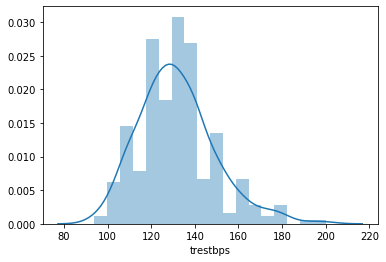

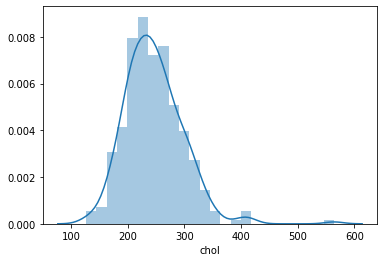

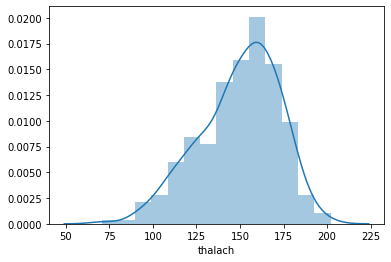

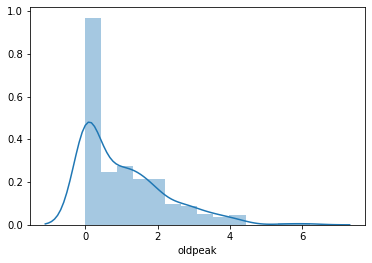

In [70]:
for col in continuous_variables:
    plt.figure()
    sns.distplot(df[col])

## Relation Target / variable

### Création sous ensemble positif / négatif

In [72]:
df_positive = df[df['target'] == 1 ]
df_negative = df[df['target'] == 0 ]

### Target et continuous variables

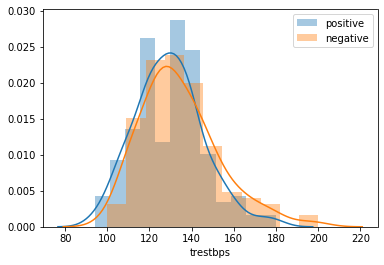

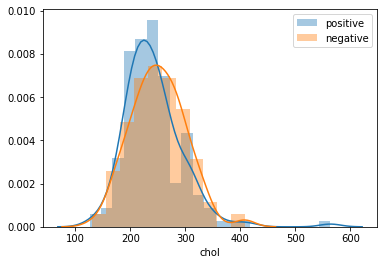

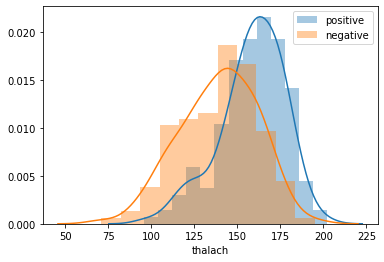

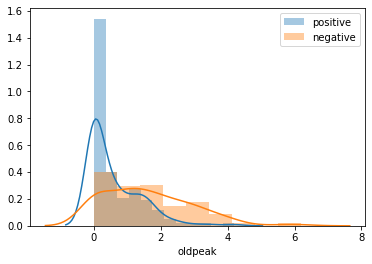

In [75]:
for col in continuos_variables:
    plt.figure()
    sns.distplot(df_positive[col], label="positive")
    sns.distplot(df_negative[col], label="negative")
    plt.legend()